# 解析幾何学：ノルム（Norm）

このノートブックでは、ベクトルのノルム（norm）について基本から学びます。

## 目次
1. [ノルムとは](#ノルムとは)
2. [L1ノルム（マンハッタン距離）](#l1ノルムマンハッタン距離)
3. [L2ノルム（ユークリッド距離）](#l2ノルムユークリッド距離)
4. [Lpノルム（一般化）](#lpノルム一般化)
5. [最大ノルム（L∞ノルム）](#最大ノルムlノルム)
6. [ノルムの性質](#ノルムの性質)
7. [幾何学的な解釈と可視化](#幾何学的な解釈と可視化)
8. [実装例](#実装例)
9. [機械学習での応用例](#機械学習での応用例)

---

## 必要なライブラリのインポート

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm

# 日本語フォントの設定
# macOSで利用可能な日本語フォントを優先的に使用
try:
    # Hiragino Sans (macOS標準の日本語フォント)を試す
    jp_fonts = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN', 'Yu Gothic',
                'Noto Sans CJK JP', 'AppleGothic', 'Arial Unicode MS']
    available_fonts = [f.name for f in fm.fontManager.ttflist]

    font_found = False
    for font_name in jp_fonts:
        if font_name in available_fonts:
            plt.rcParams['font.family'] = font_name
            font_found = True
            print(f"Using font: {font_name}")
            break

    if not font_found:
        # フォールバック: システムのデフォルトフォントを使用し、フォントキャッシュをクリア
        plt.rcParams['font.family'] = 'sans-serif'
        # 日本語フォントをフォントリストに追加
        plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN',
                                            'Yu Gothic', 'Meiryo', 'MS Gothic', 'DejaVu Sans']
        print("Using fallback font configuration")
except Exception as e:
    print(f"Font configuration warning: {e}")
    plt.rcParams['font.family'] = 'sans-serif'

# LaTeXレンダリングを有効化（数式のサブスクリプト用）
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の表示を改善

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

Using font: Hiragino Sans


---

## ノルムとは

**ノルム（norm）**は、ベクトルの「大きさ」や「長さ」を測る関数です。

### 数学的な定義

ベクトル空間 $V$ 上のノルムは、以下の3つの性質を満たす関数 $\|\cdot\|: V \to \mathbb{R}$ です：

1. **正値性（Positivity）**: $\|\mathbf{x}\| \geq 0$ かつ $\|\mathbf{x}\| = 0$ ならば $\mathbf{x} = \mathbf{0}$
2. **斉次性（Homogeneity）**: $\|\alpha \mathbf{x}\| = |\alpha| \|\mathbf{x}\|$ （$\alpha$ はスカラー）
3. **三角不等式（Triangle Inequality）**: $\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|$

### なぜノルムが重要なのか？

- **距離の測定**: 2つのベクトル間の距離を計算できる
- **最適化**: 機械学習の損失関数で使用される
- **正則化**: 過学習を防ぐために使用される
- **特徴量のスケーリング**: データの正規化に使用される

---

## L1ノルム（マンハッタン距離）

**L1ノルム**は、各成分の絶対値の和です。

### 定義

ベクトル $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ のL1ノルムは：

$$\|\mathbf{x}\|_1 = |x_1| + |x_2| + \cdots + |x_n| = \sum_{i=1}^{n} |x_i|$$

### 特徴

- **マンハッタン距離**とも呼ばれる（格子状の道路を移動する距離に似ている）
- スパース性を促進する（多くの成分を0に近づける）
- Lasso回帰で使用される

In [16]:
# L1ノルムの実装
def l1_norm(x):
    """L1ノルムを計算"""
    return np.sum(np.abs(x))

# 例
x = np.array([3, -4, 5])
l1_value = l1_norm(x)

print(f"ベクトル x = {x}")
print(f"L1ノルム = |3| + |-4| + |5| = {l1_value}")

# NumPyでの計算
print(f"NumPyでの計算: {np.linalg.norm(x, ord=1)}")

x2 = np.array([1,2,3])

print(f"X2: {x2}")
print(f"X2 L1 Norm: {np.linalg.norm(x2, ord=1)}")

x3 = np.array([-1, -2, -3])

print(f"X3: {x3}")
print(f"X3 L1 Norm: {np.linalg.norm(x3, ord=1)}")







ベクトル x = [ 3 -4  5]
L1ノルム = |3| + |-4| + |5| = 12
NumPyでの計算: 12.0
X2: [1 2 3]
X2 L1 Norm: 6.0
X3: [-1 -2 -3]
X3 L1 Norm: 6.0


---

## L2ノルム（ユークリッド距離）

**L2ノルム**は、最も一般的なノルムで、ユークリッド距離とも呼ばれます。

### 定義

ベクトル $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ のL2ノルムは：

$$\|\mathbf{x}\|_2 = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2} = \sqrt{\sum_{i=1}^{n} x_i^2}$$

### 特徴

- **ユークリッド距離**とも呼ばれる（直線距離）
- 最も直感的な「長さ」の概念
- Ridge回帰で使用される
- 滑らかな最適化特性を持つ

In [17]:
# L2ノルムの実装
def l2_norm(x):
    """L2ノルムを計算"""
    return np.sqrt(np.sum(x**2))

# 例
x = np.array([3, -4, 5])
l2_value = l2_norm(x)

print(f"ベクトル x = {x}")
print(f"L2ノルム = √(3² + (-4)² + 5²) = √(9 + 16 + 25) = √50 = {l2_value:.4f}")
print(f"NumPyでの計算: {np.linalg.norm(x, ord=2)}")
print(f"NumPyでのデフォルト: {np.linalg.norm(x)}")


x2 = np.array([1,2,3])

print(f"X2: {x2}")
print(f"X2 L2 Norm: {np.linalg.norm(x2, ord=2)}")

x3 = np.array([-1, -2, -3])

print(f"X3: {x3}")
print(f"X3 L2 Norm: {np.linalg.norm(x3, ord=2)}")

ベクトル x = [ 3 -4  5]
L2ノルム = √(3² + (-4)² + 5²) = √(9 + 16 + 25) = √50 = 7.0711
NumPyでの計算: 7.0710678118654755
NumPyでのデフォルト: 7.0710678118654755
X2: [1 2 3]
X2 L2 Norm: 3.7416573867739413
X3: [-1 -2 -3]
X3 L2 Norm: 3.7416573867739413


---

## Lpノルム（一般化）

**Lpノルム**は、L1ノルムとL2ノルムを一般化したものです。

### 定義

ベクトル $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ のLpノルム（$p \geq 1$）は：

$$\|\mathbf{x}\|_p = \left(\sum_{i=1}^{n} |x_i|^p\right)^{1/p}$$

### 特殊な場合

- $p = 1$: L1ノルム（マンハッタン距離）
- $p = 2$: L2ノルム（ユークリッド距離）
- $p \to \infty$: L∞ノルム（最大ノルム）

In [18]:
# Lpノルムの実装
def lp_norm(x, p):
    """Lpノルムを計算"""
    if p == np.inf:
        return np.max(np.abs(x))
    return np.power(np.sum(np.power(np.abs(x), p)), 1/p)

# 例：異なるp値でのノルム
x = np.array([3, -4, 5])

print(f"ベクトル x = {x}\n")
print(f"L1ノルム (p=1): {lp_norm(x, 1):.4f}")
print(f"L2ノルム (p=2): {lp_norm(x, 2):.4f}")
print(f"L3ノルム (p=3): {lp_norm(x, 3):.4f}")
print(f"L4ノルム (p=4): {lp_norm(x, 4):.4f}")
print(f"L∞ノルム (p=∞): {lp_norm(x, np.inf):.4f}")

# ----
# 【np記法の「ipbook」：Lpノルムのステップ解説】

# x = np.array([3, -4, 5])
# p = 3  # 例としてp=3で実行
p = 2

# 1. 各要素の絶対値
abs_x = np.abs(x)                # [3, 4, 5]

# 2. 各要素のp乗
abs_x_p = np.power(abs_x, p)     # [27, 64, 125]

# 3. p乗したものを合計
sum_abs_x_p = np.sum(abs_x_p)    # 216

# 4. 合計したものの1/p乗（p乗根）
lp = np.power(sum_abs_x_p, 1/p)  # 216**(1/3) ≈ 6.0

print(
    "【ipbook（逐次分解）】\n"
    f"|x_i|: {abs_x}\n"
    f"|x_i|^p: {abs_x_p}\n"
    f"sum(|x_i|^p): {sum_abs_x_p}\n"
    f"(sum)^(1/p): {lp:.4f}"
)


ベクトル x = [ 3 -4  5]

L1ノルム (p=1): 12.0000
L2ノルム (p=2): 7.0711
L3ノルム (p=3): 6.0000
L4ノルム (p=4): 5.5692
L∞ノルム (p=∞): 5.0000
【ipbook（逐次分解）】
|x_i|: [3 4 5]
|x_i|^p: [ 9 16 25]
sum(|x_i|^p): 50
(sum)^(1/p): 7.0711


---

## 最大ノルム（L∞ノルム）

**L∞ノルム**は、ベクトルの成分の絶対値の最大値です。

### 定義

ベクトル $\mathbf{x} = (x_1, x_2, \ldots, x_n)$ のL∞ノルムは：

$$\|\mathbf{x}\|_\infty = \max(|x_1|, |x_2|, \ldots, |x_n|)$$

### 特徴

- すべての成分の最大絶対値
- チェビシェフ距離とも呼ばれる
- エラーの最大値を評価する際に有用

In [19]:
# L∞ノルムの実装
def linf_norm(x):
    """L∞ノルムを計算"""
    return np.max(np.abs(x))

# 例
x = np.array([3, -4, 5])
linf_value = linf_norm(x)

print(f"ベクトル x = {x}")
print(f"L∞ノルム = max(|3|, |-4|, |5|) = max(3, 4, 5) = {linf_value}")
print(f"NumPyでの計算: {np.linalg.norm(x, ord=np.inf)}")

ベクトル x = [ 3 -4  5]
L∞ノルム = max(|3|, |-4|, |5|) = max(3, 4, 5) = 5
NumPyでの計算: 5.0


---

## ノルムの性質

ノルムの重要な性質を確認しましょう。

In [20]:
# ノルムの性質を確認
x = np.array([3, 4])
y = np.array([1, 2])
alpha = 2

print("=== ノルムの性質の確認 ===\n")

# 1. 正値性
# 「長さはマイナスにならないし、長さ0なのはゼロ・ベクトルだけ」
norm_x = np.linalg.norm(x)
print(f"1. 正値性:")
print(f"   ||x|| = {norm_x:.4f} ≥ 0 ✓")
print(f"   ||0|| = {np.linalg.norm(np.array([0, 0]))} = 0 ✓\n")

# 2. 斉次性
# 「ベクトルを2倍に引き伸ばしたら、長さもきっちり2倍になる」
print(f"2. 斉次性:")
print(f"   ||αx|| = ||{alpha} * {x}|| = {np.linalg.norm(alpha * x):.4f}")
print(f"   |α| * ||x|| = {abs(alpha)} * {norm_x:.4f} = {abs(alpha) * norm_x:.4f}")
print(f"   等しい: {np.isclose(np.linalg.norm(alpha * x), abs(alpha) * norm_x)} ✓\n")

# 3. 三角不等式
# 「寄り道するより、まっすぐ行ったほうが近い（または同じ）」
norm_x = np.linalg.norm(x)
norm_y = np.linalg.norm(y)
norm_x_plus_y = np.linalg.norm(x + y)
print(f"3. 三角不等式:")
print(f"   ||x + y|| = ||{x} + {y}|| = ||{x + y}|| = {norm_x_plus_y:.4f}")
print(f"   ||x|| + ||y|| = {norm_x:.4f} + {norm_y:.4f} = {norm_x + norm_y:.4f}")
print(f"   ||x + y|| ≤ ||x|| + ||y||: {norm_x_plus_y:.4f} ≤ {norm_x + norm_y:.4f} ✓")

=== ノルムの性質の確認 ===

1. 正値性:
   ||x|| = 5.0000 ≥ 0 ✓
   ||0|| = 0.0 = 0 ✓

2. 斉次性:
   ||αx|| = ||2 * [3 4]|| = 10.0000
   |α| * ||x|| = 2 * 5.0000 = 10.0000
   等しい: True ✓

3. 三角不等式:
   ||x + y|| = ||[3 4] + [1 2]|| = ||[4 6]|| = 7.2111
   ||x|| + ||y|| = 5.0000 + 2.2361 = 7.2361
   ||x + y|| ≤ ||x|| + ||y||: 7.2111 ≤ 7.2361 ✓


---

## 幾何学的な解釈と可視化

ノルムの幾何学的な意味を2次元と3次元で可視化します。

### 単位球（Unit Ball）

各ノルムの単位球は、ノルムが1になるベクトルの集合です：

$$\{\mathbf{x} : \|\mathbf{x}\| = 1\}$$

/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2897476352.py:50: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2897476352.py:50: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2897476352.py:50: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2897476352.py:50: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2897476352.py:50: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2897476352.py:50: UserWarning: Glyph 

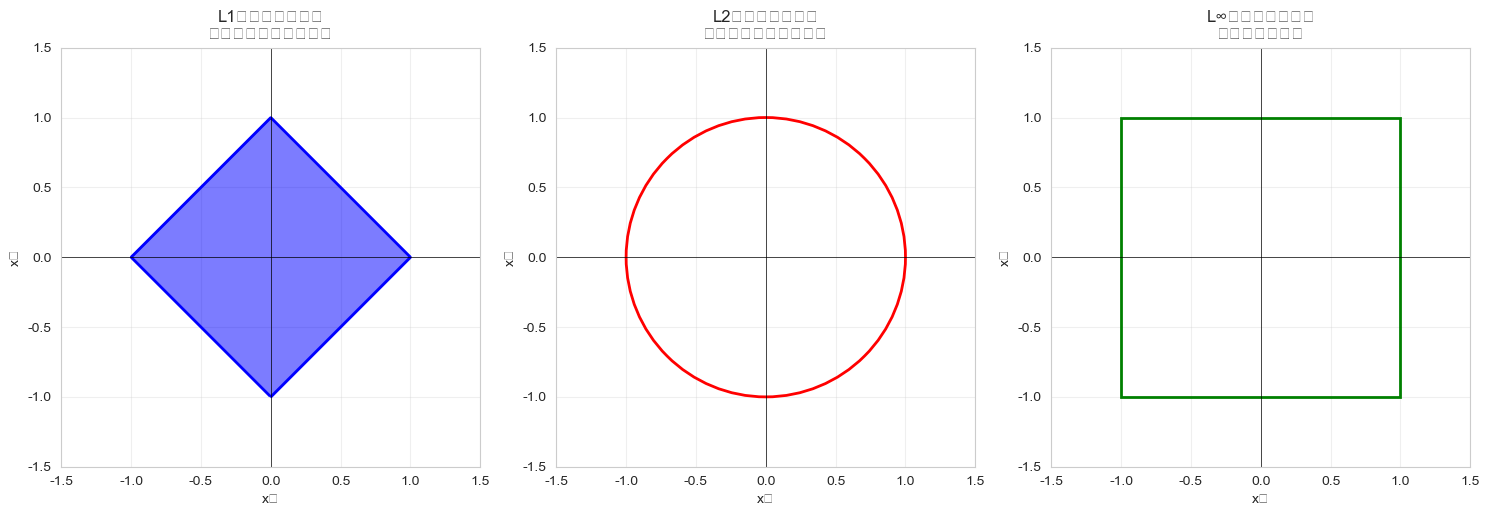

In [21]:
# 2次元での単位球の可視化
def plot_unit_balls_2d():
    """2次元での異なるノルムの単位球を可視化"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # グリッドの作成
    x = np.linspace(-1.5, 1.5, 1000)
    y = np.linspace(-1.5, 1.5, 1000)
    X, Y = np.meshgrid(x, y)

    # L1ノルムの単位球
    Z1 = np.abs(X) + np.abs(Y)
    axes[0].contour(X, Y, Z1, levels=[1], colors='blue', linewidths=2)
    axes[0].fill_between([-1, 0, 1], [0, 1, 0], [0, -1, 0], alpha=0.3, color='blue')
    axes[0].fill_between([-1, 0, 1], [0, -1, 0], [0, 1, 0], alpha=0.3, color='blue')
    axes[0].set_title('L1ノルムの単位球\n（マンハッタン距離）', fontsize=12)
    axes[0].set_xlabel('x₁')
    axes[0].set_ylabel('x₂')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_aspect('equal')
    axes[0].axhline(y=0, color='k', linewidth=0.5)
    axes[0].axvline(x=0, color='k', linewidth=0.5)

    # L2ノルムの単位球（円）
    circle = Circle((0, 0), 1, fill=False, edgecolor='red', linewidth=2)
    axes[1].add_patch(circle)
    axes[1].set_title('L2ノルムの単位球\n（ユークリッド距離）', fontsize=12)
    axes[1].set_xlabel('x₁')
    axes[1].set_ylabel('x₂')
    axes[1].set_xlim(-1.5, 1.5)
    axes[1].set_ylim(-1.5, 1.5)
    axes[1].grid(True, alpha=0.3)
    axes[1].set_aspect('equal')
    axes[1].axhline(y=0, color='k', linewidth=0.5)
    axes[1].axvline(x=0, color='k', linewidth=0.5)

    # L∞ノルムの単位球（正方形）
    square = Rectangle((-1, -1), 2, 2, fill=False, edgecolor='green', linewidth=2)
    axes[2].add_patch(square)
    axes[2].set_title('L∞ノルムの単位球\n（最大ノルム）', fontsize=12)
    axes[2].set_xlabel('x₁')
    axes[2].set_ylabel('x₂')
    axes[2].set_xlim(-1.5, 1.5)
    axes[2].set_ylim(-1.5, 1.5)
    axes[2].grid(True, alpha=0.3)
    axes[2].set_aspect('equal')
    axes[2].axhline(y=0, color='k', linewidth=0.5)
    axes[2].axvline(x=0, color='k', linewidth=0.5)

    plt.tight_layout()
    plt.show()

plot_unit_balls_2d()

/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/1134364754.py:43: UserWarning: Glyph 30064 (\N{CJK UNIFIED IDEOGRAPH-7570}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/1134364754.py:43: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/1134364754.py:43: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/1134364754.py:43: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/1134364754.py:43: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/1134364754.py:43:

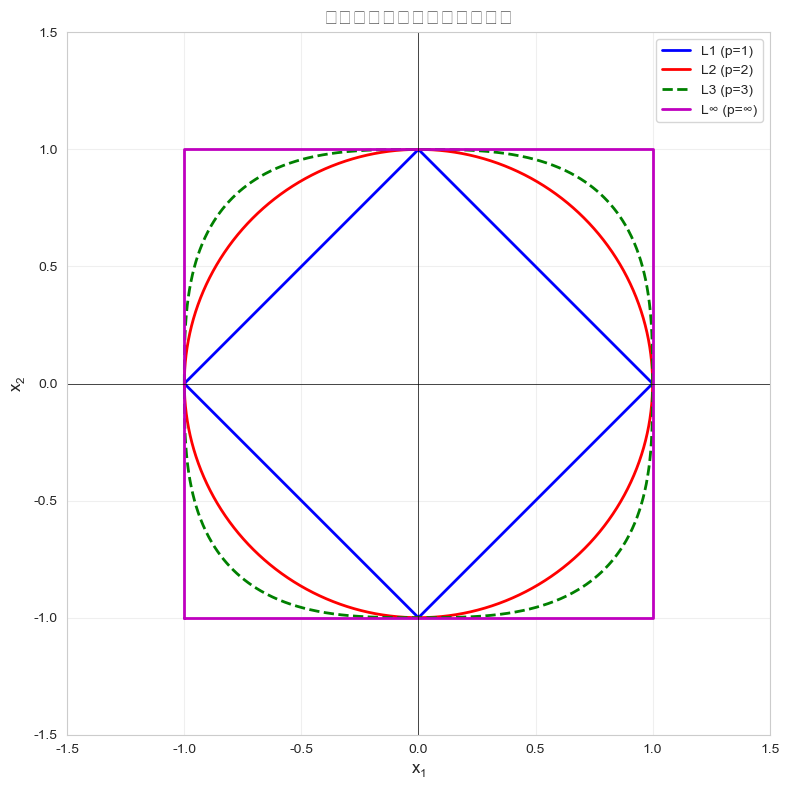

In [ ]:
# 異なるp値での単位球の比較
def plot_unit_balls_comparison():
    """異なるp値での単位球を比較"""
    fig, ax = plt.subplots(figsize=(8, 8))

    # 角度の範囲
    theta = np.linspace(0, 2*np.pi, 1000)

    # L1ノルム（ダイヤモンド）
    # |x| + |y| = 1 を満たす点
    x1 = np.concatenate([np.linspace(0, 1, 250), np.linspace(1, 0, 250),
                          np.linspace(0, -1, 250), np.linspace(-1, 0, 250)])
    y1 = np.concatenate([np.linspace(1, 0, 250), np.linspace(0, -1, 250),
                          np.linspace(-1, 0, 250), np.linspace(0, 1, 250)])
    ax.plot(x1, y1, 'b-', linewidth=2, label='L1 (p=1)')

    # L2ノルム（円）
    x2 = np.cos(theta)
    y2 = np.sin(theta)
    ax.plot(x2, y2, 'r-', linewidth=2, label='L2 (p=2)')

    # L3ノルム
    x3 = np.cos(theta) / (np.abs(np.cos(theta))**3 + np.abs(np.sin(theta))**3)**(1/3)
    y3 = np.sin(theta) / (np.abs(np.cos(theta))**3 + np.abs(np.sin(theta))**3)**(1/3)
    ax.plot(x3, y3, 'g--', linewidth=2, label='L3 (p=3)')

    # L∞ノルム（正方形）
    x_inf = np.array([-1, 1, 1, -1, -1])
    y_inf = np.array([-1, -1, 1, 1, -1])
    ax.plot(x_inf, y_inf, 'm-', linewidth=2, label='L∞ (p=∞)')

    ax.set_xlabel('x₁', fontsize=12)
    ax.set_ylabel('x₂', fontsize=12)
    ax.set_title('異なるノルムの単位球の比較', fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.legend(fontsize=10)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

    plt.tight_layout()
    plt.show()

plot_unit_balls_comparison()

/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/3750429096.py:74: UserWarning: Glyph 12494 (\N{KATAKANA LETTER NO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/3750429096.py:74: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/3750429096.py:74: UserWarning: Glyph 12512 (\N{KATAKANA LETTER MU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/3750429096.py:74: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/3750429096.py:74: UserWarning: Glyph 21336 (\N{CJK UNIFIED IDEOGRAPH-5358}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/3750429096.py:74:

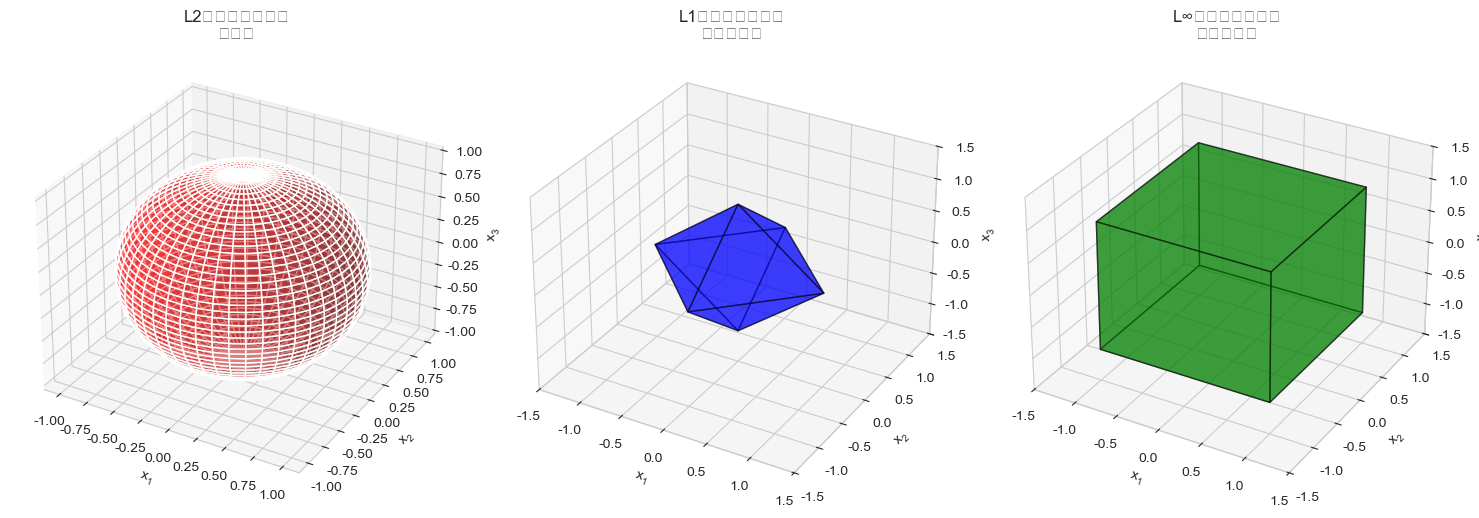

In [ ]:
# 3次元での単位球の可視化
def plot_unit_balls_3d():
    """3次元での異なるノルムの単位球を可視化"""
    fig = plt.figure(figsize=(15, 5))

    # パラメータ化
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 50)

    # L2ノルム（球）
    ax1 = fig.add_subplot(131, projection='3d')
    x2 = np.outer(np.cos(u), np.sin(v))
    y2 = np.outer(np.sin(u), np.sin(v))
    z2 = np.outer(np.ones(np.size(u)), np.cos(v))
    ax1.plot_surface(x2, y2, z2, alpha=0.5, color='red')
    ax1.set_title('L2ノルムの単位球\n（球）', fontsize=12)
    ax1.set_xlabel('x₁')
    ax1.set_ylabel('x₂')
    ax1.set_zlabel('x₃')

    # L1ノルム（八面体）
    ax2 = fig.add_subplot(132, projection='3d')
    # 八面体の頂点
    vertices = np.array([
        [1, 0, 0], [-1, 0, 0],
        [0, 1, 0], [0, -1, 0],
        [0, 0, 1], [0, 0, -1]
    ])
    # 面を描画（簡略化）
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    faces = [
        [vertices[0], vertices[2], vertices[4]],
        [vertices[0], vertices[2], vertices[5]],
        [vertices[0], vertices[3], vertices[4]],
        [vertices[0], vertices[3], vertices[5]],
        [vertices[1], vertices[2], vertices[4]],
        [vertices[1], vertices[2], vertices[5]],
        [vertices[1], vertices[3], vertices[4]],
        [vertices[1], vertices[3], vertices[5]]
    ]
    ax2.add_collection3d(Poly3DCollection(faces, alpha=0.5, facecolor='blue', edgecolor='black'))
    ax2.set_xlim([-1.5, 1.5])
    ax2.set_ylim([-1.5, 1.5])
    ax2.set_zlim([-1.5, 1.5])
    ax2.set_title('L1ノルムの単位球\n（八面体）', fontsize=12)
    ax2.set_xlabel('x₁')
    ax2.set_ylabel('x₂')
    ax2.set_zlabel('x₃')

    # L∞ノルム（立方体）
    ax3 = fig.add_subplot(133, projection='3d')
    # 立方体の頂点
    cube_vertices = np.array([
        [-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1],
        [-1, -1, 1], [1, -1, 1], [1, 1, 1], [-1, 1, 1]
    ])
    cube_faces = [
        [cube_vertices[0], cube_vertices[1], cube_vertices[2], cube_vertices[3]],
        [cube_vertices[4], cube_vertices[5], cube_vertices[6], cube_vertices[7]],
        [cube_vertices[0], cube_vertices[1], cube_vertices[5], cube_vertices[4]],
        [cube_vertices[2], cube_vertices[3], cube_vertices[7], cube_vertices[6]],
        [cube_vertices[0], cube_vertices[3], cube_vertices[7], cube_vertices[4]],
        [cube_vertices[1], cube_vertices[2], cube_vertices[6], cube_vertices[5]]
    ]
    ax3.add_collection3d(Poly3DCollection(cube_faces, alpha=0.5, facecolor='green', edgecolor='black'))
    ax3.set_xlim([-1.5, 1.5])
    ax3.set_ylim([-1.5, 1.5])
    ax3.set_zlim([-1.5, 1.5])
    ax3.set_title('L∞ノルムの単位球\n（立方体）', fontsize=12)
    ax3.set_xlabel('x₁')
    ax3.set_ylabel('x₂')
    ax3.set_zlabel('x₃')

    plt.tight_layout()
    plt.show()

plot_unit_balls_3d()

---

## 実装例

実用的なノルムの実装例を見てみましょう。

In [24]:
class VectorNorm:
    """ベクトルノルムを計算するクラス"""

    @staticmethod
    def l1(x):
        """L1ノルム"""
        return np.sum(np.abs(x))

    @staticmethod
    def l2(x):
        """L2ノルム"""
        return np.sqrt(np.sum(x**2))

    @staticmethod
    def lp(x, p):
        """Lpノルム"""
        if p == np.inf:
            return np.max(np.abs(x))
        return np.power(np.sum(np.power(np.abs(x), p)), 1/p)

    @staticmethod
    def linf(x):
        """L∞ノルム"""
        return np.max(np.abs(x))

    @staticmethod
    def distance(x, y, p=2):
        """2つのベクトル間の距離を計算"""
        return VectorNorm.lp(x - y, p)

    @staticmethod
    def normalize(x, p=2):
        """ベクトルを正規化（単位ベクトルに変換）"""
        norm = VectorNorm.lp(x, p)
        if norm == 0:
            return x
        return x / norm

# 使用例
x = np.array([3, -4, 5])
y = np.array([1, 2, -1])

print("=== ノルムの計算 ===")
print(f"ベクトル x = {x}")
print(f"L1ノルム: {VectorNorm.l1(x):.4f}")
print(f"L2ノルム: {VectorNorm.l2(x):.4f}")
print(f"L∞ノルム: {VectorNorm.linf(x):.4f}")
print(f"\nベクトル y = {y}")
print(f"L2ノルム: {VectorNorm.l2(y):.4f}")
print(f"\n=== 距離の計算 ===")
print(f"xとyのL2距離: {VectorNorm.distance(x, y, p=2):.4f}")
print(f"xとyのL1距離: {VectorNorm.distance(x, y, p=1):.4f}")
print(f"\n=== 正規化 ===")
x_normalized = VectorNorm.normalize(x)
print(f"正規化前: {x}")
print(f"正規化後: {x_normalized}")
print(f"正規化後のL2ノルム: {VectorNorm.l2(x_normalized):.4f}")

=== ノルムの計算 ===
ベクトル x = [ 3 -4  5]
L1ノルム: 12.0000
L2ノルム: 7.0711
L∞ノルム: 5.0000

ベクトル y = [ 1  2 -1]
L2ノルム: 2.4495

=== 距離の計算 ===
xとyのL2距離: 8.7178
xとyのL1距離: 14.0000

=== 正規化 ===
正規化前: [ 3 -4  5]
正規化後: [ 0.42426407 -0.56568542  0.70710678]
正規化後のL2ノルム: 1.0000


In [25]:
# ノルムの比較：異なるベクトルでの挙動
vectors = {
    'スパース': np.array([1, 0, 0, 0, 0]),
    '密': np.array([0.2, 0.2, 0.2, 0.2, 0.2]),
    '大きな値': np.array([10, 0, 0, 0, 0]),
    '均等': np.array([1, 1, 1, 1, 1])
}

print("=== 異なるベクトルでのノルムの比較 ===\n")
print(f"{'ベクトル':<15} {'L1':<10} {'L2':<10} {'L∞':<10}")
print("-" * 50)

for name, vec in vectors.items():
    l1 = VectorNorm.l1(vec)
    l2 = VectorNorm.l2(vec)
    linf = VectorNorm.linf(vec)
    print(f"{name:<15} {l1:<10.4f} {l2:<10.4f} {linf:<10.4f}")

=== 異なるベクトルでのノルムの比較 ===

ベクトル            L1         L2         L∞        
--------------------------------------------------
スパース            1.0000     1.0000     1.0000    
密               1.0000     0.4472     0.2000    
大きな値            10.0000    10.0000    10.0000   
均等              5.0000     2.2361     1.0000    


---

## 機械学習での応用例

ノルムは機械学習の様々な場面で使用されます。

### 1. 正則化（Regularization）

#### L1正則化（Lasso）

L1正則化は、多くの重みを0にすることでスパースなモデルを作成します：

$$\text{Loss} = \text{MSE} + \lambda \|\mathbf{w}\|_1$$

#### L2正則化（Ridge）

L2正則化は、重みを小さく保つことで過学習を防ぎます：

$$\text{Loss} = \text{MSE} + \lambda \|\mathbf{w}\|_2^2$$

/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/908435988.py:44: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/908435988.py:44: UserWarning: Glyph 21063 (\N{CJK UNIFIED IDEOGRAPH-5247}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/908435988.py:44: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/908435988.py:44: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/908435988.py:44: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipyke

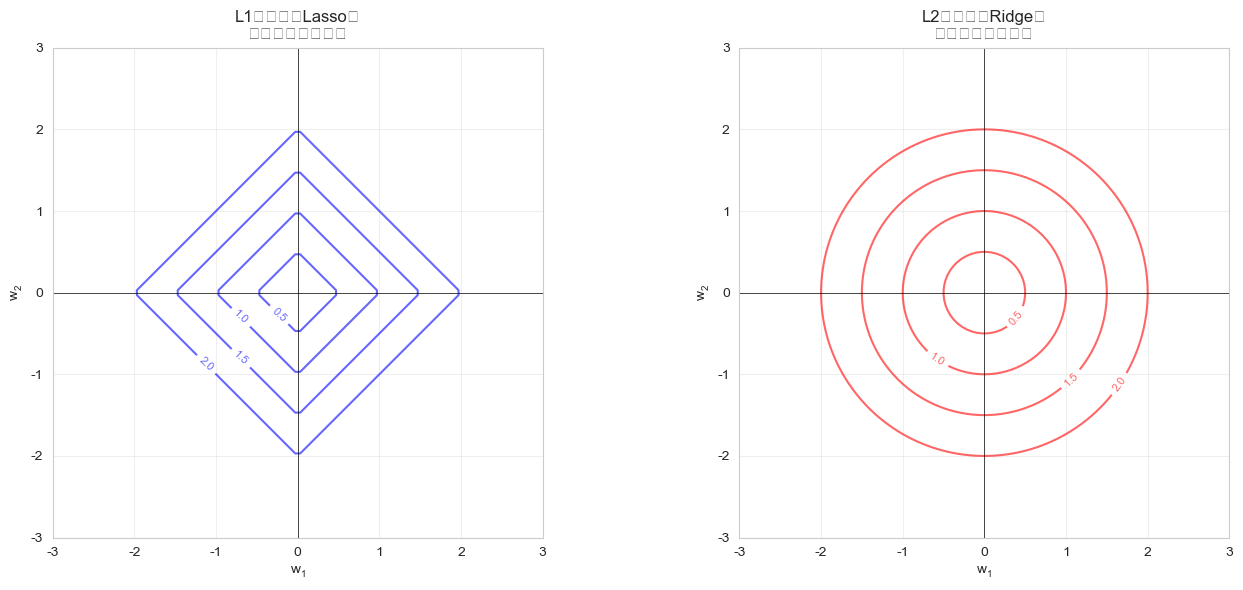

In [ ]:
# 正則化の可視化
def visualize_regularization():
    """L1とL2正則化の効果を可視化"""
    # 簡単な線形回帰の例
    np.random.seed(42)
    X = np.random.randn(100, 2)
    y = X @ np.array([2, -1]) + 0.1 * np.random.randn(100)

    # 重み空間での制約
    w1 = np.linspace(-3, 3, 100)
    w2 = np.linspace(-3, 3, 100)
    W1, W2 = np.meshgrid(w1, w2)

    # L1制約
    L1_constraint = np.abs(W1) + np.abs(W2)

    # L2制約
    L2_constraint = np.sqrt(W1**2 + W2**2)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # L1正則化
    contour1 = axes[0].contour(W1, W2, L1_constraint, levels=[0.5, 1, 1.5, 2], colors='blue', alpha=0.6)
    axes[0].clabel(contour1, inline=True, fontsize=8)
    axes[0].set_title('L1正則化（Lasso）\nスパース性を促進', fontsize=12)
    axes[0].set_xlabel('w₁')
    axes[0].set_ylabel('w₂')
    axes[0].grid(True, alpha=0.3)
    axes[0].axhline(y=0, color='k', linewidth=0.5)
    axes[0].axvline(x=0, color='k', linewidth=0.5)
    axes[0].set_aspect('equal')

    # L2正則化
    contour2 = axes[1].contour(W1, W2, L2_constraint, levels=[0.5, 1, 1.5, 2], colors='red', alpha=0.6)
    axes[1].clabel(contour2, inline=True, fontsize=8)
    axes[1].set_title('L2正則化（Ridge）\n重みを小さく保つ', fontsize=12)
    axes[1].set_xlabel('w₁')
    axes[1].set_ylabel('w₂')
    axes[1].grid(True, alpha=0.3)
    axes[1].axhline(y=0, color='k', linewidth=0.5)
    axes[1].axvline(x=0, color='k', linewidth=0.5)
    axes[1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

visualize_regularization()

### 2. 距離計算

ノルムは、データポイント間の距離を計算するために使用されます。

=== k-NNでの距離計算 ===

クエリポイント: [3 3]

ポイント 1: [1 2]
  L1距離: 3.0000
  L2距離: 2.2361

ポイント 2: [3 4]
  L1距離: 1.0000
  L2距離: 1.0000

ポイント 3: [5 1]
  L1距離: 4.0000
  L2距離: 2.8284

ポイント 4: [2 5]
  L1距離: 3.0000
  L2距離: 2.2361

L1距離で最も近いポイント: [3 4] (距離: 1.0000)
L2距離で最も近いポイント: [3 4] (距離: 1.0000)


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2480289134.py:52: UserWarning: Glyph 12391 (\N{HIRAGANA LETTER DE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2480289134.py:52: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2480289134.py:52: UserWarning: Glyph 36317 (\N{CJK UNIFIED IDEOGRAPH-8DDD}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2480289134.py:52: UserWarning: Glyph 38626 (\N{CJK UNIFIED IDEOGRAPH-96E2}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2480289134.py:52: UserWarning: Glyph 35336 (\N{CJK UNIFIED IDEOGRAPH-8A08}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/2

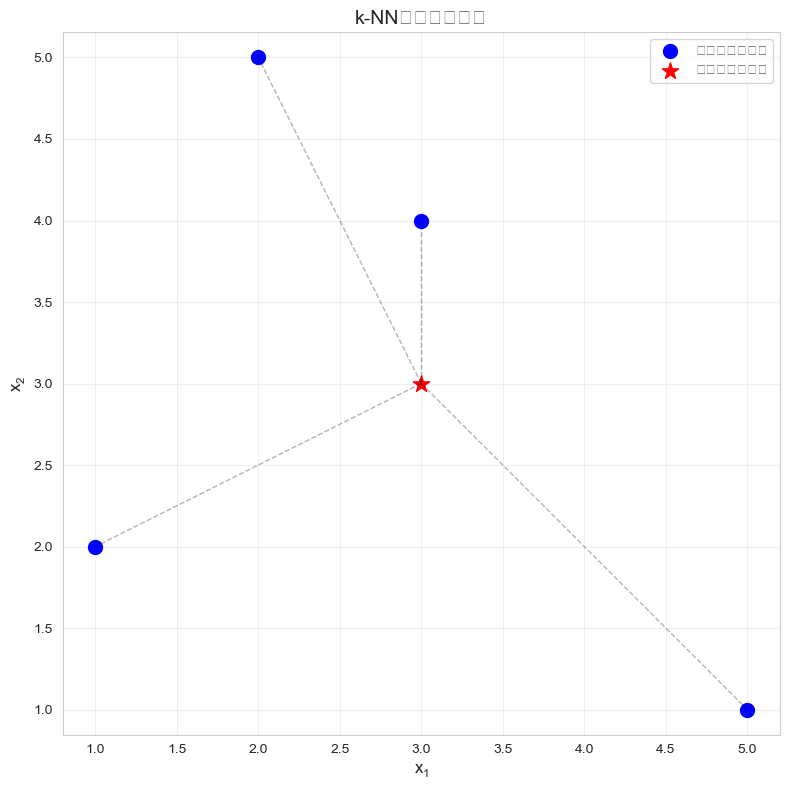

In [ ]:
# k-NNアルゴリズムでの距離計算の例
def knn_distance_example():
    """k-NNでの距離計算の例"""
    # サンプルデータポイント
    points = np.array([
        [1, 2],
        [3, 4],
        [5, 1],
        [2, 5]
    ])

    query_point = np.array([3, 3])

    print("=== k-NNでの距離計算 ===\n")
    print(f"クエリポイント: {query_point}\n")

    distances_l1 = []
    distances_l2 = []

    for i, point in enumerate(points):
        d_l1 = VectorNorm.distance(query_point, point, p=1)
        d_l2 = VectorNorm.distance(query_point, point, p=2)
        distances_l1.append(d_l1)
        distances_l2.append(d_l2)
        print(f"ポイント {i+1}: {point}")
        print(f"  L1距離: {d_l1:.4f}")
        print(f"  L2距離: {d_l2:.4f}\n")

    # 最も近いポイント
    nearest_l1 = np.argmin(distances_l1)
    nearest_l2 = np.argmin(distances_l2)

    print(f"L1距離で最も近いポイント: {points[nearest_l1]} (距離: {distances_l1[nearest_l1]:.4f})")
    print(f"L2距離で最も近いポイント: {points[nearest_l2]} (距離: {distances_l2[nearest_l2]:.4f})")

    # 可視化
    plt.figure(figsize=(8, 8))
    plt.scatter(points[:, 0], points[:, 1], s=100, c='blue', marker='o', label='データポイント')
    plt.scatter(query_point[0], query_point[1], s=150, c='red', marker='*', label='クエリポイント')

    # 距離線を描画
    for point in points:
        plt.plot([query_point[0], point[0]], [query_point[1], point[1]],
                'k--', alpha=0.3, linewidth=1)

    plt.xlabel('x₁', fontsize=12)
    plt.ylabel('x₂', fontsize=12)
    plt.title('k-NNでの距離計算', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

knn_distance_example()

### 3. 特徴量の正規化

ノルムを使用して特徴量を正規化し、スケールの違いを除去します。

=== 特徴量の正規化 ===

元のデータ:
[[100.    2. ]
 [200.    4. ]
 [150.    3. ]
 [180.    3.5]]

各サンプルのL2ノルム:
  サンプル 1: 100.0200
  サンプル 2: 200.0400
  サンプル 3: 150.0300
  サンプル 4: 180.0340

L2正規化後:
[[0.99980006 0.019996  ]
 [0.99980006 0.019996  ]
 [0.99980006 0.019996  ]
 [0.99981101 0.01944077]]

各サンプルのL2ノルム（正規化後）:
  サンプル 1: 1.0000
  サンプル 2: 1.0000
  サンプル 3: 1.0000
  サンプル 4: 1.0000


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/1378127267.py:47: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/1378127267.py:47: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/1378127267.py:47: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/1378127267.py:47: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_92940/1378127267.py:47: UserWarning: Glyph 35215 (\N{CJK UNIFIED IDEOGRAPH-898F}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/i

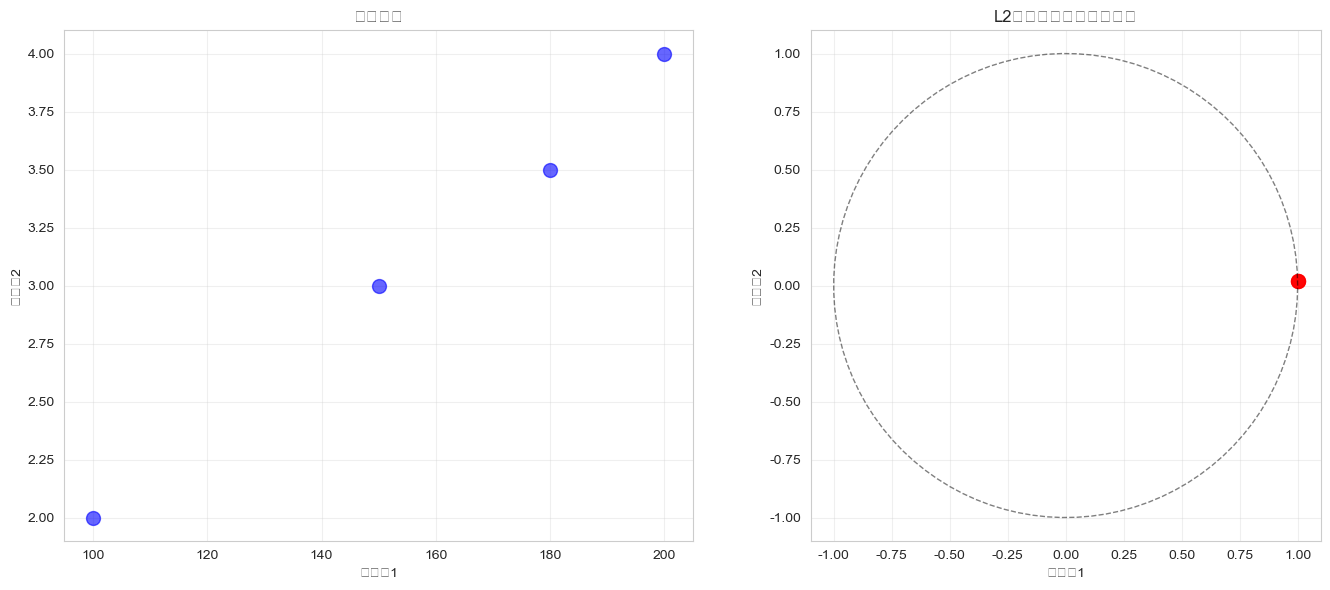

In [28]:
# 特徴量の正規化の例
def feature_normalization_example():
    """特徴量の正規化の例"""
    # 異なるスケールの特徴量
    X = np.array([
        [100, 2],
        [200, 4],
        [150, 3],
        [180, 3.5]
    ])

    print("=== 特徴量の正規化 ===\n")
    print("元のデータ:")
    print(X)
    print(f"\n各サンプルのL2ノルム:")
    for i, x in enumerate(X):
        print(f"  サンプル {i+1}: {VectorNorm.l2(x):.4f}")

    # L2正規化
    X_normalized = np.array([VectorNorm.normalize(x, p=2) for x in X])

    print("\nL2正規化後:")
    print(X_normalized)
    print(f"\n各サンプルのL2ノルム（正規化後）:")
    for i, x in enumerate(X_normalized):
        print(f"  サンプル {i+1}: {VectorNorm.l2(x):.4f}")

    # 可視化
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].scatter(X[:, 0], X[:, 1], s=100, c='blue', alpha=0.6)
    axes[0].set_title('正規化前', fontsize=12)
    axes[0].set_xlabel('特徴量1')
    axes[0].set_ylabel('特徴量2')
    axes[0].grid(True, alpha=0.3)

    axes[1].scatter(X_normalized[:, 0], X_normalized[:, 1], s=100, c='red', alpha=0.6)
    # 単位円を描画
    theta = np.linspace(0, 2*np.pi, 100)
    axes[1].plot(np.cos(theta), np.sin(theta), 'k--', linewidth=1, alpha=0.5)
    axes[1].set_title('L2正規化後（単位円上）', fontsize=12)
    axes[1].set_xlabel('特徴量1')
    axes[1].set_ylabel('特徴量2')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_aspect('equal')

    plt.tight_layout()
    plt.show()

feature_normalization_example()

---

## まとめ

このノートブックでは、ノルムの基本概念から応用まで学びました：

1. **ノルムの定義**: ベクトルの「大きさ」を測る関数
2. **主要なノルム**:
   - L1ノルム: スパース性を促進
   - L2ノルム: 最も一般的なユークリッド距離
   - Lpノルム: 一般化されたノルム
   - L∞ノルム: 最大絶対値
3. **幾何学的解釈**: 単位球の形状が異なる
4. **機械学習での応用**:
   - 正則化（L1/L2）
   - 距離計算（k-NNなど）
   - 特徴量の正規化

### 練習問題

1. ベクトル $\mathbf{x} = (3, -4, 12)$ のL1、L2、L∞ノルムを計算してください。
2. 2つのベクトル $\mathbf{x} = (1, 2, 3)$ と $\mathbf{y} = (4, 5, 6)$ のL2距離を計算してください。
3. ベクトル $\mathbf{x} = (5, 12)$ をL2正規化してください。
4. L1正則化とL2正則化の違いを説明してください。

### 参考文献

- "Mathematics for Machine Learning" by Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong
- "Linear Algebra Done Right" by Sheldon Axler
- "Pattern Recognition and Machine Learning" by Christopher M. Bishop